## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [8]:
"""
Compile your model
"""
model.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

In [9]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.6410 - acc: 0.7754 - val_loss: 1.6124 - val_acc: 0.5323
Epoch 2/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.5966 - acc: 0.7949 - val_loss: 1.6083 - val_acc: 0.5357
Epoch 3/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.5756 - acc: 0.8024 - val_loss: 1.6134 - val_acc: 0.5387
Epoch 4/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.5625 - acc: 0.8070 - val_loss: 1.6201 - val_acc: 0.5392
Epoch 5/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.5532 - acc: 0.8107 - val_loss: 1.6284 - val_acc: 0.5408
Epoch 6/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.5461 - acc: 0.8135 - val_loss: 1.6353 - val_acc: 0.5404
Epoch 7/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.5405 - acc: 0.8151 - val_loss: 1.6423 - 

50000/50000 [==============================] - 3s 63us/step - loss: 0.4765 - acc: 0.8374 - val_loss: 1.8018 - val_acc: 0.5372
Epoch 60/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4758 - acc: 0.8384 - val_loss: 1.8040 - val_acc: 0.5358
Epoch 61/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.4753 - acc: 0.8379 - val_loss: 1.8056 - val_acc: 0.5363
Epoch 62/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4747 - acc: 0.8381 - val_loss: 1.8085 - val_acc: 0.5364
Epoch 63/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4741 - acc: 0.8385 - val_loss: 1.8107 - val_acc: 0.5374
Epoch 64/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4735 - acc: 0.8387 - val_loss: 1.8123 - val_acc: 0.5355
Epoch 65/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4730 - acc: 0.8392 - val_loss: 1.8149 - val_acc: 0.5341
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4478 - acc: 0.8495 - val_loss: 1.9102 - val_acc: 0.5336
Epoch 119/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4474 - acc: 0.8496 - val_loss: 1.9116 - val_acc: 0.5348
Epoch 120/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4469 - acc: 0.8502 - val_loss: 1.9142 - val_acc: 0.5343
Epoch 121/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4465 - acc: 0.8498 - val_loss: 1.9153 - val_acc: 0.5349
Epoch 122/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4460 - acc: 0.8500 - val_loss: 1.9159 - val_acc: 0.5334
Epoch 123/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4458 - acc: 0.8503 - val_loss: 1.9174 - val_acc: 0.5349
Epoch 124/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4454 - acc: 0.8505 - val_loss: 1.9191 - val_acc: 0.5339
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 64us/step - loss: 0.4263 - acc: 0.8577 - val_loss: 1.9985 - val_acc: 0.5319
Epoch 177/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4259 - acc: 0.8581 - val_loss: 1.9997 - val_acc: 0.5316
Epoch 178/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4256 - acc: 0.8583 - val_loss: 2.0008 - val_acc: 0.5319
Epoch 179/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4252 - acc: 0.8582 - val_loss: 2.0017 - val_acc: 0.5316
Epoch 180/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4249 - acc: 0.8584 - val_loss: 2.0039 - val_acc: 0.5303
Epoch 181/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4246 - acc: 0.8589 - val_loss: 2.0044 - val_acc: 0.5318
Epoch 182/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4242 - acc: 0.8587 - val_loss: 2.0059 - val_acc: 0.5323
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 64us/step - loss: 0.4075 - acc: 0.8647 - val_loss: 2.0771 - val_acc: 0.5300
Epoch 235/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4071 - acc: 0.8652 - val_loss: 2.0795 - val_acc: 0.5294
Epoch 236/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.4069 - acc: 0.8655 - val_loss: 2.0789 - val_acc: 0.5302
Epoch 237/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.4066 - acc: 0.8655 - val_loss: 2.0810 - val_acc: 0.5292
Epoch 238/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.4063 - acc: 0.8658 - val_loss: 2.0821 - val_acc: 0.5297
Epoch 239/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.4060 - acc: 0.8660 - val_loss: 2.0841 - val_acc: 0.5288
Epoch 240/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.4056 - acc: 0.8658 - val_loss: 2.0841 - val_acc: 0.5298
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 0.3903 - acc: 0.8719 - val_loss: 2.1517 - val_acc: 0.5277
Epoch 293/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.3900 - acc: 0.8723 - val_loss: 2.1535 - val_acc: 0.5279
Epoch 294/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.3897 - acc: 0.8720 - val_loss: 2.1542 - val_acc: 0.5286
Epoch 295/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3894 - acc: 0.8721 - val_loss: 2.1560 - val_acc: 0.5275
Epoch 296/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.3891 - acc: 0.8729 - val_loss: 2.1579 - val_acc: 0.5286
Epoch 297/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3889 - acc: 0.8726 - val_loss: 2.1606 - val_acc: 0.5268
Epoch 298/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.3886 - acc: 0.8727 - val_loss: 2.1596 - val_acc: 0.5283
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 68us/step - loss: 0.3740 - acc: 0.8783 - val_loss: 2.2260 - val_acc: 0.5273
Epoch 351/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.3739 - acc: 0.8782 - val_loss: 2.2282 - val_acc: 0.5266
Epoch 352/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.3735 - acc: 0.8788 - val_loss: 2.2306 - val_acc: 0.5251
Epoch 353/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.3733 - acc: 0.8788 - val_loss: 2.2302 - val_acc: 0.5273
Epoch 354/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.3731 - acc: 0.8788 - val_loss: 2.2325 - val_acc: 0.5269
Epoch 355/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.3727 - acc: 0.8793 - val_loss: 2.2340 - val_acc: 0.5266
Epoch 356/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.3725 - acc: 0.8788 - val_loss: 2.2354 - val_acc: 0.5267
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 4s 71us/step - loss: 0.3588 - acc: 0.8840 - val_loss: 2.3015 - val_acc: 0.5282
Epoch 409/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.3586 - acc: 0.8838 - val_loss: 2.3011 - val_acc: 0.5274
Epoch 410/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.3582 - acc: 0.8846 - val_loss: 2.3038 - val_acc: 0.5268
Epoch 411/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.3580 - acc: 0.8846 - val_loss: 2.3039 - val_acc: 0.5280
Epoch 412/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.3578 - acc: 0.8844 - val_loss: 2.3070 - val_acc: 0.5265
Epoch 413/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.3575 - acc: 0.8845 - val_loss: 2.3076 - val_acc: 0.5266
Epoch 414/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.3572 - acc: 0.8850 - val_loss: 2.3087 - val_acc: 0.5275
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 0.3441 - acc: 0.8895 - val_loss: 2.3763 - val_acc: 0.5275
Epoch 467/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.3438 - acc: 0.8894 - val_loss: 2.3797 - val_acc: 0.5269
Epoch 468/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.3437 - acc: 0.8900 - val_loss: 2.3799 - val_acc: 0.5275
Epoch 469/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.3434 - acc: 0.8898 - val_loss: 2.3801 - val_acc: 0.5271
Epoch 470/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.3431 - acc: 0.8905 - val_loss: 2.3825 - val_acc: 0.5270
Epoch 471/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.3429 - acc: 0.8895 - val_loss: 2.3848 - val_acc: 0.5267
Epoch 472/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.3425 - acc: 0.8901 - val_loss: 2.3856 - val_acc: 0.5264
Epoch 473/500
50000/50000 [=======

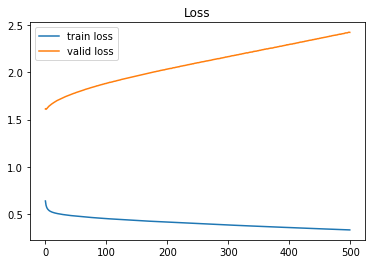

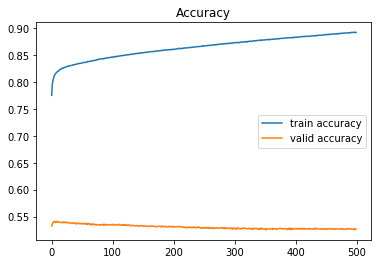

In [11]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()